In [8]:
import math
import numpy as np
import matplotlib.pyplot as plt
from datasets import load_dataset

dataset = load_dataset("mnist")

data = dataset["train"]

list_of_lists = []

for i in range(10):
    new_list = [] 
    list_of_lists.append(new_list)

for data_info in data:
    list_of_lists[data_info["label"]].append(np.array(data_info['image']).flatten())


X = [] 

for i in range(10):
    gg = len(list_of_lists[i])
    selected_numbers = np.random.choice(gg, size=100, replace=False)   # selecting 100 images from each class
    for ind in selected_numbers:         
        X.append(list_of_lists[i][ind])                                # appending a total of 1000 images in X

X = np.array(X)                                                         # converting into a numpy array
X = X.astype(np.float64)
X/=255

row_means = np.mean(X, axis=0)                                         # calculating means of each column

XX = X - row_means                                                     # centralized matrix

cov_matrix = np.cov(XX.T)                                              # calculating the covariance matrix with each column as a data

eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)                 # callulating eigenvalues and eigen vectors

for i in range(len(eigenvalues)):                                      # if eigenvalues are negative making them zero as variance can't be negative
    if eigenvalues[i]<0:
        eigenvalues[i]=0

sorted_indices = np.argsort(eigenvalues)[::-1]                         # sorting the indices of eigenvalues based on eigen values (descending order)

sorted_eigenvectors = eigenvectors[:,sorted_indices]                   # sorting eigenvalues based on sorted indices

sorted_eigenvalues = np.sort(eigenvalues)[::-1]                        # sorting eigenvalues in descending order

        
total_var = np.sum(eigenvalues)                                        # calculating total variance

for i in range(len(sorted_eigenvalues)):                               # printing variance percentage of all principle components
    print(f'PC {i+1} variance percentage = {100*(sorted_eigenvalues[i]/total_var)}%')


PC 1 variance percentage = 9.5975301390498%
PC 2 variance percentage = 7.164670605390551%
PC 3 variance percentage = 5.92353138022004%
PC 4 variance percentage = 5.528164809419773%
PC 5 variance percentage = 5.213988421050951%
PC 6 variance percentage = 4.257240546526283%
PC 7 variance percentage = 3.4863629998140215%
PC 8 variance percentage = 2.985431795536899%
PC 9 variance percentage = 2.9005677286362697%
PC 10 variance percentage = 2.4440883768963224%
PC 11 variance percentage = 2.0693882831167953%
PC 12 variance percentage = 1.9980847816281573%
PC 13 variance percentage = 1.8064955515557615%
PC 14 variance percentage = 1.6890302959762429%
PC 15 variance percentage = 1.6335309131230344%
PC 16 variance percentage = 1.5948405900972036%
PC 17 variance percentage = 1.3952563677894427%
PC 18 variance percentage = 1.336134496714535%
PC 19 variance percentage = 1.2065904009155277%
PC 20 variance percentage = 1.1786313765988763%
PC 21 variance percentage = 1.1029790990171398%
PC 22 varian

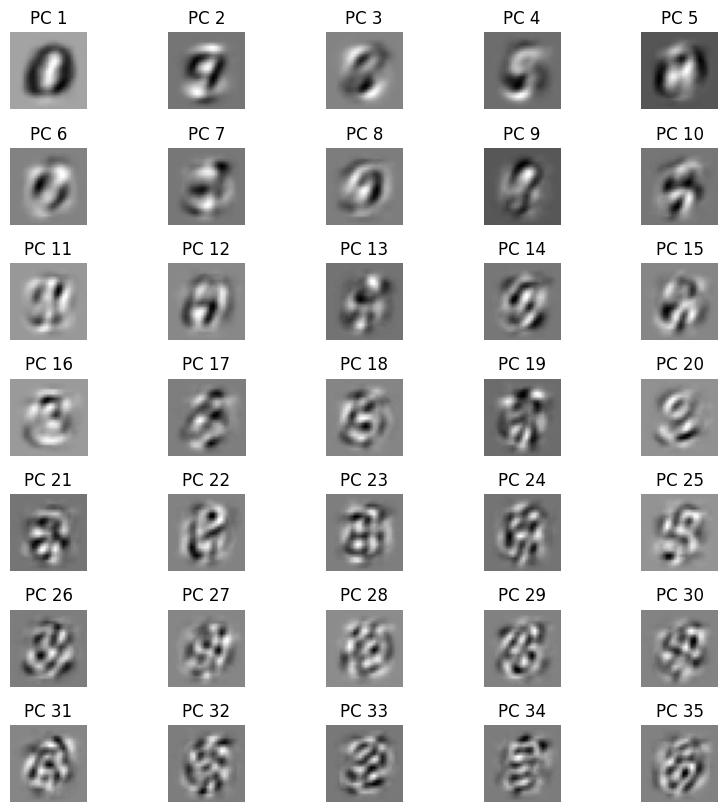

In [9]:
fig, axes = plt.subplots(7, 5, figsize=(10,10),gridspec_kw={'wspace': 0.1, 'hspace': 0.5})

pc_arry = sorted_eigenvectors.T

axes = axes.flatten()

for i in range(35):
    axes[i].imshow(pc_arry[i].reshape(28,28), cmap='gray')
    axes[i].axis('off')  
    axes[i].set_title(f'PC {i + 1}')

plt.axis('off')

plt.show()    # printing top 35 pc's

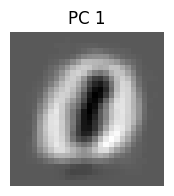

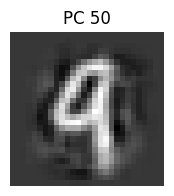

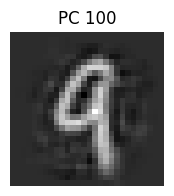

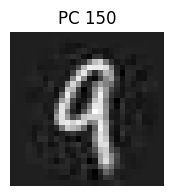

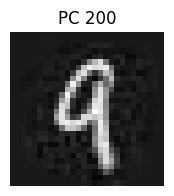

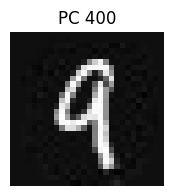

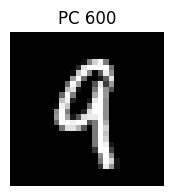

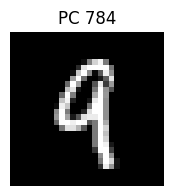

In [10]:
import random

rand_digit = random.randint(0, 999)      # taking a random image from the test dataset
    
data_point = np.array(dataset["test"][rand_digit]["image"]).flatten()

center = data_point - row_means         # centralizing the data point

pc_count = [1,50,100,150,200,400,600,784]

for i in range(len(pc_count)):
    selected_eigenvectors = sorted_eigenvectors[:, :pc_count[i]]
    reconstructed_data_point = np.dot(np.dot(center, selected_eigenvectors), selected_eigenvectors.T) + row_means

    plt.figure(figsize=(2, 2))
    plt.imshow(reconstructed_data_point.reshape(28, 28), cmap='gray')
    plt.title(f'PC {pc_count[i]}')
    plt.axis('off')
    plt.show()


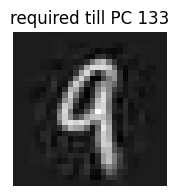

In [15]:
limit_sum = 0.95*total_var
sum =0.0
count = 0


for lamda in sorted_eigenvalues:         #calculating required no. of pcs required
    sum+=lamda
    count+=1
    if sum >= limit_sum:
        break

    
selected_eigenvectors = sorted_eigenvectors[:, :count]      #taking count no. of pcs so that we have atleast 95% variance percentage total

reconstructed_data_point = np.dot(np.dot(center, selected_eigenvectors), selected_eigenvectors.T) + row_means    #reconstructing the data point


plt.figure(figsize=(2, 2))
plt.imshow(reconstructed_data_point.reshape(28, 28), cmap='gray')
plt.title(f'required till PC {count}')
plt.axis('off')
plt.show()


In [12]:
def fun(kernal,f,d):   

    e1 = np.zeros(1000)
    for i in range(1000):
        for j in range(1000):
            e1[i]+=kernal[i][j]
   
    all = np.sum(e1)

    for i in range(1000):
        for j in range(1000):
            kernal[i][j]=kernal[i][j]-((e1[i]+e1[j])/1000-all/1000000)

    k_eigenvalues, k_eigenvectors = np.linalg.eigh(kernal)

    # for ii in range(len(k_eigenvalues)):        #not doing this as making zero can cause trouble while finding alphas
    #     if k_eigenvalues[ii]<0:
    #         k_eigenvalues[ii]=0

    k_sorted_indices = np.argsort(k_eigenvalues)[::-1]

    k_sorted_eigenvectors = k_eigenvectors[:,k_sorted_indices]

    k_sorted_eigenvalues = np.sort(k_eigenvalues)[::-1]

    alphas = []

    for i in range(1000):
        alphas.append((k_sorted_eigenvectors.T[i])/(np.sqrt(abs(k_sorted_eigenvalues[i]))))

    plot_proj1 = []
    for i in range(1000):
        plot_proj1.append(np.dot(kernal[i],alphas[0]))

    plot_proj2 = []
    for i in range(1000):
        plot_proj2.append(np.dot(kernal[i],alphas[1]))
        
    plt.scatter(plot_proj1, plot_proj2, label='datapoints')
    plt.xlabel('projection on alpha1')
    plt.ylabel('projection on alpha2')
    if f==0:
        plt.title(f'polynomail with d = {d}')
    else:
        plt.title(f'gaussian with sigma = {d}')
    plt.legend()
    plt.show()

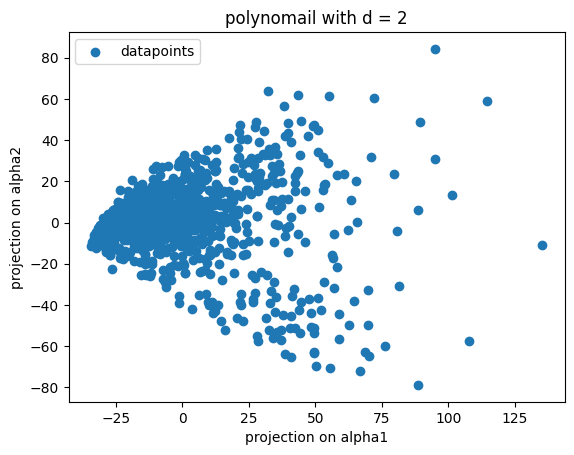

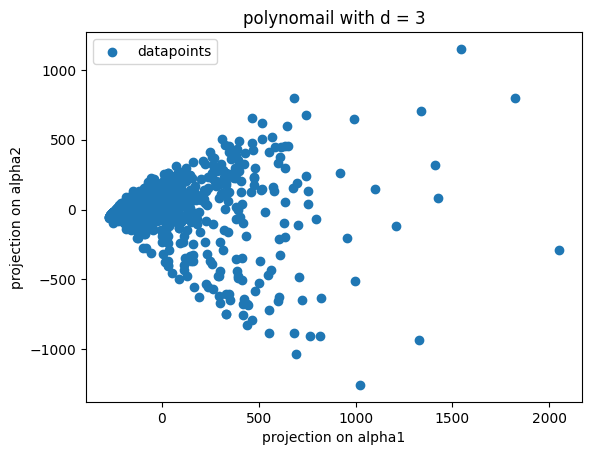

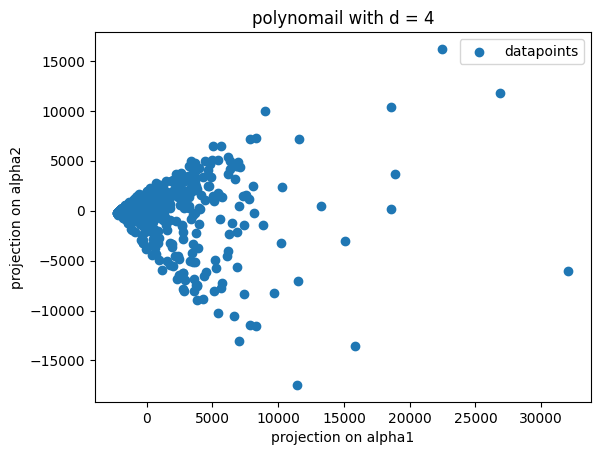

In [16]:
kernal= np.zeros((1000, 1000))
for i in range(1000):
    for j in range(1000):
        kernal[i][j]=(1+np.dot(X[i].T,X[j]))**2

fun(kernal,0,2)

kernal= np.zeros((1000, 1000))
for i in range(1000):
    for j in range(1000):
        kernal[i][j]=(1+np.dot(X[i].T,X[j]))**3

fun(kernal,0,3)

kernal= np.zeros((1000, 1000))
for i in range(1000):
    for j in range(1000):
        kernal[i][j]=(1+np.dot(X[i].T,X[j]))**4

fun(kernal,0,4)

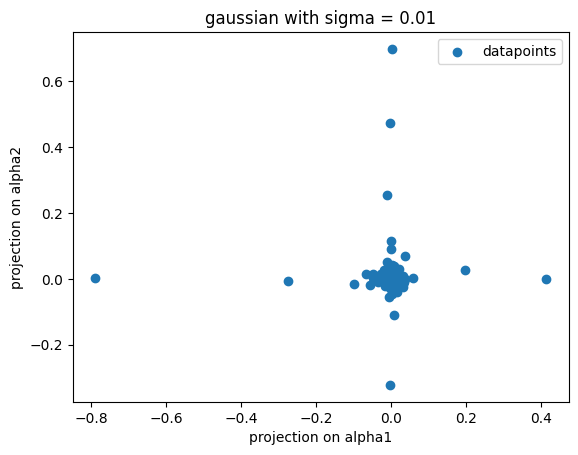

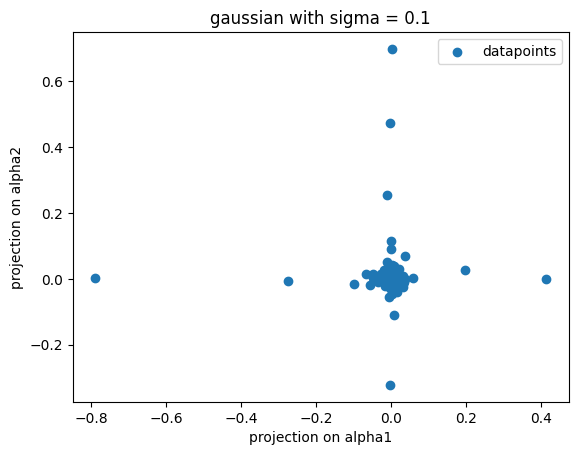

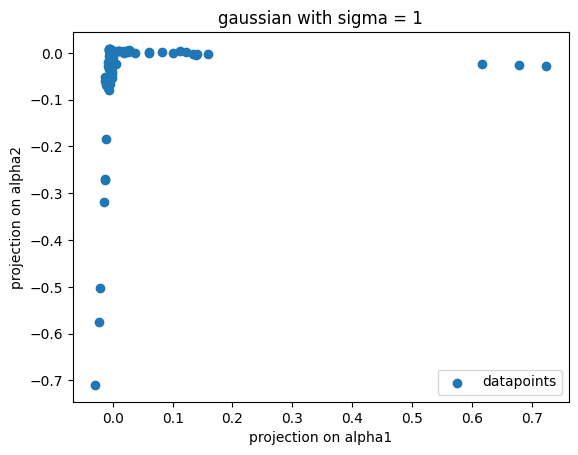

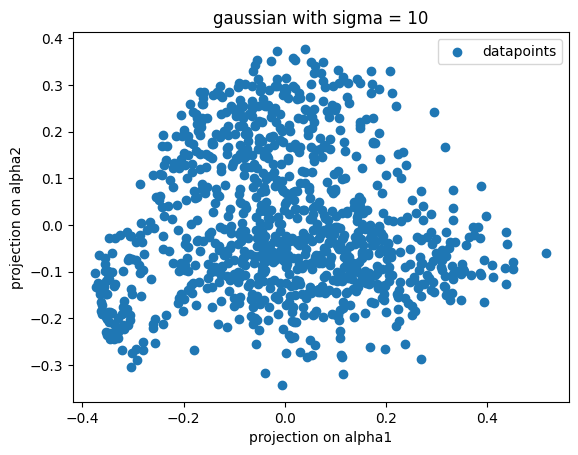

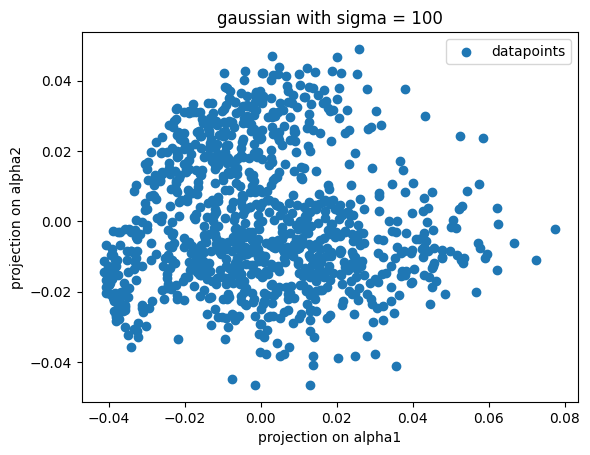

In [20]:
kernal= np.zeros((1000, 1000))
for i in range(1000):
    for j in range(1000):
        kernal[i][j]=math.exp(-1*(np.dot(((X[i]-X[j]).T),(X[i]-X[j])))/(2*(math.pow(0.01,2))))

fun(kernal,1,0.01)

kernal= np.zeros((1000, 1000))
for i in range(1000):
    for j in range(1000):
        kernal[i][j]=math.exp(-1*(np.dot(((X[i]-X[j]).T),(X[i]-X[j])))/(2*(math.pow(0.1,2))))

fun(kernal,1,0.1)


kernal= np.zeros((1000, 1000))
for i in range(1000):
    for j in range(1000):
        kernal[i][j]=math.exp(-1*(np.dot(((X[i]-X[j]).T),(X[i]-X[j])))/(2*(math.pow(1,2))))

fun(kernal,1,1)

kernal= np.zeros((1000, 1000))
for i in range(1000):
    for j in range(1000):
        kernal[i][j]=math.exp(-1*(np.dot(((X[i]-X[j]).T),(X[i]-X[j])))/(2*(math.pow(10,2))))

fun(kernal,1,10)

kernal= np.zeros((1000, 1000))
for i in range(1000):
    for j in range(1000):
        kernal[i][j]=math.exp(-1*(np.dot(((X[i]-X[j]).T),(X[i]-X[j])))/(2*(math.pow(100,2))))

fun(kernal,1,100)
